## SubductionConvergence class usage examples

In [1]:
import pygplates
import pandas as pd
import numpy as np

%matplotlib inline
%load_ext autoreload
%autoreload 2

print(pygplates.__version__)

from gprm import ReconstructionModel, SubductionConvergence

2.2.0.28


In [78]:
# Build an object describing a reconstruction model

M2016 = ReconstructionModel('Matthews++2016')
M2016.add_rotation_model('/Applications/GPlates-2.2.0//SampleData/FeatureCollections/Rotations/Matthews_etal_GPC_2016_410-0Ma_GK07.rot')
M2016.add_static_polygons('/Applications/GPlates-2.2.0/SampleData/FeatureCollections/StaticPolygons/Muller_etal_AREPS_2016_StaticPolygons.gpmlz')
M2016.add_dynamic_polygons('/Applications/GPlates-2.2.0/SampleData/FeatureCollections/DynamicPolygons/Matthews_etal_GPC_2016_MesozoicCenozoic_PlateTopologies.gpmlz')
M2016.add_dynamic_polygons('/Applications/GPlates-2.2.0/SampleData/FeatureCollections/DynamicPolygons/Matthews_etal_GPC_2016_Paleozoic_PlateTopologies.gpmlz')


/Users/Simon/GIT/PlateTectonicTools/ptt/subduction_convergence.py:358: RuntimeWarning: Unable to find the subducting plate of the subducting sub-segment "Subduction East Ligurian Ocean simple clean" at 120.0Ma.
    Either the subduction polarity is not properly set or there is not exactly one subducting plate sharing the sub-segment.
    Ignoring current sub-segment.
  warnings.warn('Unable to find the subducting plate of the subducting sub-segment "{0}" at {1}Ma.\n'
/Users/Simon/GIT/PlateTectonicTools/ptt/subduction_convergence.py:358: RuntimeWarning: Unable to find the subducting plate of the subducting sub-segment "Alpine subduction clean" at 120.0Ma.
    Either the subduction polarity is not properly set or there is not exactly one subducting plate sharing the sub-segment.
    Ignoring current sub-segment.
  warnings.warn('Unable to find the subducting plate of the subducting sub-segment "{0}" at {1}Ma.\n'
/Users/Simon/GIT/PlateTectonicTools/ptt/subduction_convergence.py:358: Runti

<Figure size 864x360 with 0 Axes>

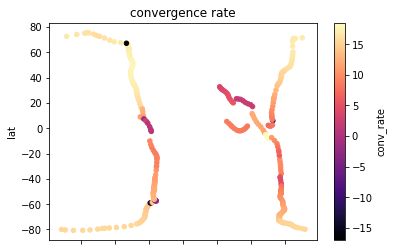

<Figure size 864x360 with 0 Axes>

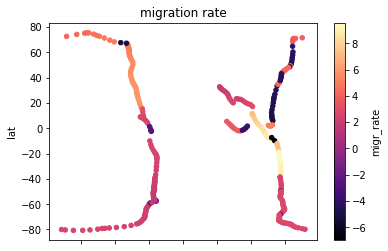

In [79]:
# compute the subduction zone kinematics for a single time snapshot
# results are returned in a 'SubductionConvergence' class object

subduction_kinematics_120Ma = SubductionConvergence(M2016,120.,threshold_sampling_distance_radians=5.)

subduction_kinematics_120Ma.plot('cr')
subduction_kinematics_120Ma.plot('mr')


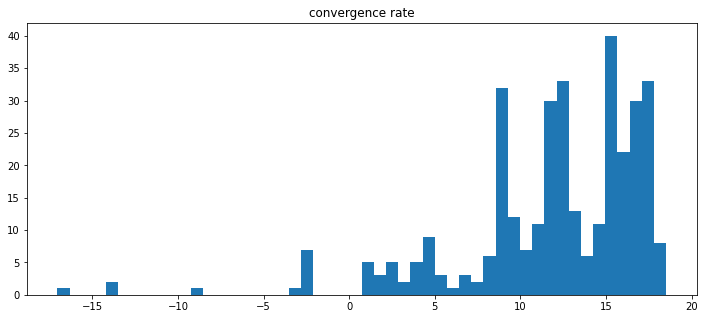

In [80]:
subduction_kinematics_120Ma.hist('cr')

In [ ]:
subduction_kinematics = SubductionConvergence(M2016, np.arange(0,201,1),
                                              threshold_sampling_distance_radians=5.,
                                              velocity_delta_time=1.)


<Figure size 864x360 with 0 Axes>

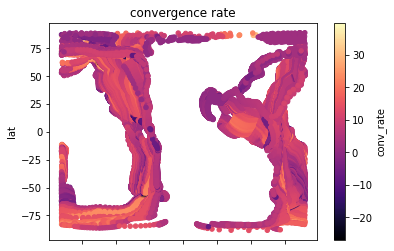

<Figure size 864x360 with 0 Axes>

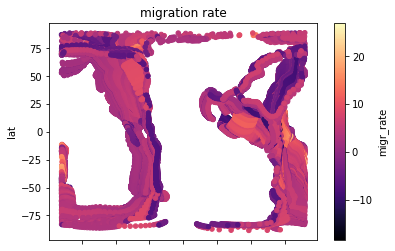

In [93]:
subduction_kinematics.plot('cr')
subduction_kinematics.plot('mr')



In [94]:

mr = np.asarray(subduction_kinematics.df['migr_rate'])
mo = np.asarray(subduction_kinematics.df['migr_obliq'])
subduction_kinematics.df['ortho_migr_rate'] = pd.Series(mr*np.sin(np.radians(np.abs(mo))), index=subduction_kinematics.df.index)

cr = np.asarray(subduction_kinematics.df['conv_rate'])
co = np.asarray(subduction_kinematics.df['conv_obliq'])
subduction_kinematics.df['ortho_conv_rate'] = pd.Series(cr*np.abs(np.cos(np.radians(co))), index=subduction_kinematics.df.index)



In [95]:
subduction_kinematics.df.head()

,lon,lat,conv_rate,conv_obliq,migr_rate,migr_obliq,arc_length,arc_azimuth,subducting_plate,overriding_plate,time,ortho_migr_rate,ortho_conv_rate
0,153.424400,-5.795090,10.360372,51.228548,-7.276062,-84.417681,0.474840,5.575956,849,830,0,-7.241555,6.487825
1,152.879139,-5.712715,10.982568,42.379682,7.289055,-96.573816,0.623794,10.967442,849,830,0,7.241131,8.112761
2,152.241727,-5.786468,11.542885,70.971884,-7.164331,-71.403335,0.708144,337.923021,849,830,0,-6.790259,3.763351
3,151.740962,-6.047199,11.791941,81.498359,-6.848797,-63.300449,0.425241,323.079726,849,830,0,-6.118543,1.743294
4,151.309446,-6.344206,11.980689,73.755135,-6.550106,-73.588806,0.618839,326.839751,849,830,0,-6.283247,3.351514


15.0


<ipython-input-102-0796ea55f625>:44: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax1.pcolormesh(TimeStepList, VelBins, histCat.T, cmap=blue_clear_red, vmin=VMIN, vmax=VMAX)


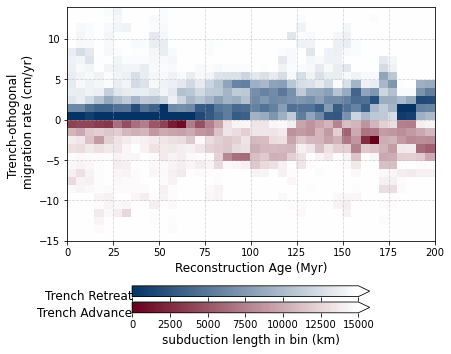

In [102]:
# Example of a time-dependent histogram similar to those used in Williams++ EPSL 2015; Müller et al 2019

import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
df = subduction_kinematics.df

my_red = (0.4,0.0,0.1)
my_blue = (0.02,0.2,0.4)
blue_clear_red = LinearSegmentedColormap.from_list("", [my_red, 'white', my_blue])

MinTime = 0.
MaxTime = 200. 
TimeStep = 5.
VMIN = -15000.
VMAX = 15000.


length_of_one_arc_degree = (np.pi/180.)*pygplates.Earth.mean_radius_in_kms


fig = plt.figure(figsize=(6,5))
ax1 = fig.add_axes([0.1, 0.3, 0.85, 0.65])

TimeStepList = np.arange(MinTime,MaxTime+TimeStep,TimeStep)
VelBins = np.arange(-15,15,1.0)
histCat = np.zeros((len(TimeStepList),len(VelBins)))
count = 0
for TIME in TimeStepList:
    subset = df[(df['time']>=TIME) & (df['time']<(TIME+TimeStep))]
        
    tmp = []
    for Bin in VelBins:
        subset_bin = subset[(subset['ortho_migr_rate']>=Bin) & (subset['ortho_migr_rate']<(Bin+1.0))]
        tmp.append(subset_bin['arc_length'].sum()*length_of_one_arc_degree/TimeStep)
    histCat[count,:] = tmp
    
    count=count+1

histCat[:,0:int(len(VelBins)/2)] = histCat[:,0:int(len(VelBins)/2)]*-1

ax1.pcolormesh(TimeStepList, VelBins, histCat.T, cmap=blue_clear_red, vmin=VMIN, vmax=VMAX)
ax1.set_xlim([MinTime,200])
plt.ylabel('Trench-othogonal \n migration rate (cm/yr)', fontsize=12)
plt.xlabel('Reconstruction Age (Myr)', fontsize=12)
plt.grid(linestyle='--',alpha=0.5)

# Colorbars - make spearate scales for trench advance and trench retreat
ax2 = fig.add_axes([0.25, 0.145, 0.55, 0.03])
blue_clear = LinearSegmentedColormap.from_list('',[my_blue,'white'])
norm = mpl.colors.Normalize(vmin=0, vmax=VMAX)
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=blue_clear,
                                   norm=norm,
                                   extend='max',
                                   orientation='horizontal')
cb1.ax.set_xticklabels([])
plt.text(1.07,0.5,'Trench Retreat', verticalalignment='center',horizontalalignment='right',fontsize=12)

ax3 = fig.add_axes([0.25, 0.1, 0.55, 0.03])
red_clear = LinearSegmentedColormap.from_list('',[my_red,'white'])
norm = mpl.colors.Normalize(vmin=0, vmax=VMAX)
cb2 = mpl.colorbar.ColorbarBase(ax3, cmap=red_clear,
                                   norm=norm,
                                   extend='max',
                                   orientation='horizontal')
plt.text(1.07,0.5,'Trench Advance', verticalalignment='center',horizontalalignment='right', fontsize=12)

cb2.set_label('subduction length in bin (km)',fontsize=12)

plt.show()
